*Breast Cancer Wisconsin Dataset*

Binary labels: malignant vs benign

~30 numeric features

Slightly imbalanced

**Data block**

In [3]:
import os, sys
sys.path.append(os.path.abspath(".."))

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from src.model import LogisticRegression, StandardScaler

# Load dataset
data = load_breast_cancer()
X = data.data # (569, 30)
y = data.target # (569,)

# Split to train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Reshape labels 
y_train = y_train.reshape(-1, 1)
y_test =  y_test.reshape(-1, 1)

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Model and Training**

In [4]:
model = LogisticRegression(
    n_features=X_train.shape[1],
    lr=0.01,
    reg_lambda=0.001
)

epochs = 500
losses = []

for epoch in range(epochs):
    # Forward pass
    z, y_hat = model.forward(X_train)
    loss = model.loss(y_train, y_hat)
    losses.append(loss)
    # Gradient decent
    dW, dB = model.backward(X_train, y_train, y_hat)
    # take a step 
    model.update(dW, dB)
    print(f"Epoch: {epoch} | Loss: {loss}")

Epoch: 0 | Loss: 0.6132596819328954
Epoch: 1 | Loss: 0.6101257058404328
Epoch: 2 | Loss: 0.6070157383902806
Epoch: 3 | Loss: 0.6039295620678982
Epoch: 4 | Loss: 0.6008669635885356
Epoch: 5 | Loss: 0.5978277337921688
Epoch: 6 | Loss: 0.5948116675398442
Epoch: 7 | Loss: 0.5918185636114051
Epoch: 8 | Loss: 0.5888482246045617
Epoch: 9 | Loss: 0.5859004568352889
Epoch: 10 | Loss: 0.5829750702395151
Epoch: 11 | Loss: 0.5800718782760871
Epoch: 12 | Loss: 0.5771906978309846
Epoch: 13 | Loss: 0.5743313491227655
Epoch: 14 | Loss: 0.5714936556092217
Epoch: 15 | Loss: 0.5686774438952302
Epoch: 16 | Loss: 0.5658825436417794
Epoch: 17 | Loss: 0.5631087874761573
Epoch: 18 | Loss: 0.5603560109032856
Epoch: 19 | Loss: 0.5576240522181884
Epoch: 20 | Loss: 0.554912752419579
Epoch: 21 | Loss: 0.5522219551245571
Epoch: 22 | Loss: 0.5495515064844019
Epoch: 23 | Loss: 0.5469012551014536
Epoch: 24 | Loss: 0.5442710519470738
Epoch: 25 | Loss: 0.5416607502806763
Epoch: 26 | Loss: 0.5390702055698217
Epoch: 27 | 

**Model Accuracy and Loss Graph**

Accuracy: 0.9406593406593406


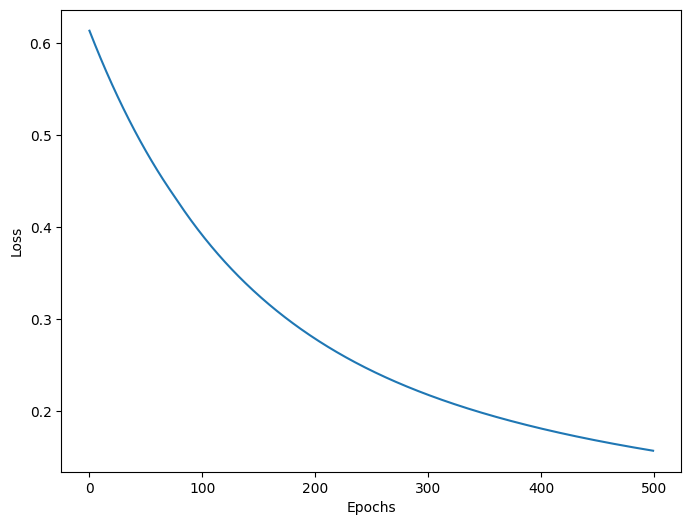

In [7]:
accuracy = model.accuracy(y_train, y_hat)

print(f"Accuracy: {accuracy}")

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot([i for i in range(epochs)], losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()